# Python Data Visualization

This workshop will introduce you to how to create beautiful and functional visualizations in Python. We will start with a brief introduction to some key principles of visualization in Python, introduce `matplotlib` and `seaborn` as key packages for data visualization in Python, and explore basic visualizations and ways to customize them.

Visualization is meant to convey information.

> The power of a graph is its ability to enable one to take in the quantitative information, organize it, and see patterns and structure not readily revealed by other means of studying the data.

\- Cleveland and McGill, 1984

Certain techniques make that information easier to interpret and understand. In their 1984 paper titled, "[Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods](https://www-jstor-org.libproxy.berkeley.edu/stable/2288400?seq=1#page_scan_tab_contents)," Cleveland and McGill identify 10 elementary perceptual tasks that are used to "extract quantitative information from graphs." Their premise is:

> A graphical form that involves elementary perceptual tasks that lead to more accurate judgments than another graphical form (with the same quantitative information) will result in better organization and increase the chances of a correct perception of patterns and behavior.

Whereas graph design had, up to that point, been "largely unscientific," Cleveland and McGill took a systematic approach in analyzing human graphical perception through experimentation. Their researched helped identify the most and least accurate elementary perceptual tasks, ordered below:

1. Position
2. Length, direction, angle
3. Area, volume
4. Shading, color saturation

In 2010, [Heer and Bostock](http://vis.stanford.edu/files/2010-MTurk-CHI.pdf) confirmed these results using Amazon's Mechanical Turk.

Let's take a look at a few examples. Because we're only interested in relative sizes, we don't include a legend with size information or reference points.

Let's take a look at the circles below- what perceptual property is being used to communicate differences?

**Question:** Which value is bigger: E or L? How about L or M?

![circles](../images/circles.png)

For circles of distinctly different sizes, the comparison is simple. For example, "A" is smaller than "B." However, for circles, such as "L" and "M," that are almost the same size, it's difficult to tell which is smaller. 

Now let's look at the same data using another propery - which property is being used below?

**Question:** Which value is bigger: E or L? How about L and M?

![bars](../images/bars.png)

Focusing on "L" and "M," it is clear to see which is larger.

The way we design plots can also highlight certain properties of the data. For this example, let's suppose we're working with student English and math test scores. Here, we'll use a bar for each student, which we arbitrarily label Z-L. The question is, which bars should we use? This is a case where the answer depends on what we're trying to communicate. 

One option is to use a 'stacked bar chart'.

**Question:** Let's compare the overall scores of student S and N - which one has a higher overall score? Now let's compare the math sccore of students S and N - which is higher?

![two_bars](../images/two-series-0.png)

An alternative version is the 'double-ended bar chart', shown below. Compare S and N in the workshop below: which has a higher math score? Which has a higher overall score?

**Question:** If you wanted to communicate overall score, which plot would you use? If comparing individual tests, which would you use?

![two_bars_centered](../images/two-series-1.png)

## Form and Function

A good visualization *reveals* patterns in the data, rather than simply repeating numbers. Often the aesthetics (form) of the visualization serve this goal, but it is important to center the key information communicatated (function). The following quotes are some different perspectives on how to balance form and function in visualizations.

> A good graphic realizes two basic goals: It **presents** information, and it allows users to **explore** that information.

\- Alberto Cairo

-------------------------

> A data visualization should only be beautiful when beauty can promote understanding in some way without undermining it in another. Is beauty sometimes useful? Certainly. Is beauty always useful? Certainly not.

\- Stephen Few

-------------------------

> Good displays of data help to reveal knowledge relevant to understanding mechanism, process and dynamics, cause and effect.

\- Edward Tufte

-------------------------

>A figure is ineffective if it "wastes too much real estate (and the designer's time) on things that don't help readers understand [it]." 

\- Alberto Cairo

-------------------------

> The important criterion for a graph is not simply how fast we can see a result; rather it is whether through the use of the graph we can see something that would have been harder to see otherwise or that could not have been seen at all.

\- William Cleveland

-------------------------

> [A]lways take advantage of the space you have available to seek depth within reasonable limits. After that, *and only after that*, worry about how to make the presentation prettier.

\- Alberto Cairo



----------------------

Some organizing principles to consider in your visualizations:
- Identify your audience- different fields and different audiences will have different conventions around visualization.
- Whitespace is your friend- a crowded visualization is often more difficult to interpret
- Use things like font size, bolding, and transparency to highlight key features of your data and background contextual information
- Not everything needs to be a visualization - consider if a table or other ways of communicating results might be appropriate
- Create accessible visualizations - using redundant contrasts (for example both color and marker shape) can help your visualization be robustly informative

Ultimately, identify your audience and their needs and interests- your visualization should tell a story about your data!

## Creating Visualizations:  `matplotlib`

Now, we'll start learning how to make visualizations in Python. We'll start by using a popular Python package called `matplotlib` to explore the main basic types of plots and how to make them.

In [58]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Import the data

To illustrate these packages, we will use the so-called Gapminder dataset, which was compiled by Jennifer Bryan. This dataset contains several key demographic and economic statistics for many countries, across many years. For more information, see the [gapminder](https://github.com/jennybc/gapminder) repository.

We'll use the `pandas` Python package to load the `.csv` (comma separated values) file that contains the dataset. The `pandas` package provides `DataFrame` objects that organize datasets in tabular form (think Microsoft Excel spreadsheets). We've created an alias for the `pandas` package, called `pd`, which is the convention. To read in a `.csv` file we simply use `pd.read_csv`. This `.csv` file happens to be tab-delimited, so we need to specify `sep=\t`.

In [59]:
gm = pd.read_csv('../data/gapminder.tsv', sep='\t')

`pandas` includes a type of object called a `DataFrame`, which is a tabular data format that comes with methods (or bound functions) that helps us interact with the data. Let's use the `head()` method to look at the first few rows of the data set.

**Question:** What does a row represent in the data set?

In [60]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


It looks like we have information about life expectancy (`lifeExp`), population (`pop`) and per-capita GDP (`gdpPercap`), across multiple years per country. 

To start off, let's say we want to explore the data from the most recent year in the dataset. First we'll find the maximum value for year, and then create a second `DataFrame` containing data from only that year. We'll do that using Boolean Masking (for an introduction on how to use `pandas`, see the DLab's ["Introduction to Pandas" workshop](https://github.com/dlab-berkeley/introduction-to-pandas))

What is the most recent year in the data set?

In [61]:
latest_year = gm['year'].max()
latest_year

2007

Subset the data set to just the latest year using a *boolean mask*.

In [62]:
gm_latest = gm.loc[gm['year'] == latest_year,:]
gm_latest.shape

(142, 6)

Ok, looks like we have 142 values, or rows, across our 6 variables, or columns. Let's get an idea of how per-capita GDP was distributed across all of the countries during 2007 by calculating some **summary statistics**. We'll do that using the `DataFrame`'s `.describe()` method.

In [63]:
gm_latest['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

Across 142 countries the mean GDP was ~\\$11680, and the standard deviation was ~\\$12860! There was a lot of deviation in GDP across countries, so these summary statistics alone don't give us the whole picture. So now, let's turn to our first basic visualization, the histogram.

### Histograms

Histograms plot the distribution of one variable across its entire range of values. This is an effective visualization for looking at central tendencies (mean, median, mode) and variance.


First, we need to get the data in the right shape for this model. Since we are plotting one variable, we need to extract one column from the data frame: 

In [64]:
gm_latest['gdpPercap']

11        974.580338
23       5937.029526
35       6223.367465
47       4797.231267
59      12779.379640
            ...     
1655     2441.576404
1667     3025.349798
1679     2280.769906
1691     1271.211593
1703      469.709298
Name: gdpPercap, Length: 142, dtype: float64

Now let's use that with the `matplotlib` function `plt.hist()` to make our first visualization. In `matplotlib` each type of plot has a sepcific function, which contains arguments that allow you customize the function specifically - we will see an example of this in just a moment.

**Question:** What does the x and y axis stand for?

(array([66., 22., 16.,  5.,  5.,  7.,  9.,  6.,  3.,  3.]),
 array([  277.5518587 ,  5185.51568983, 10093.47952096, 15001.44335209,
        19909.40718322, 24817.37101435, 29725.33484548, 34633.29867661,
        39541.26250774, 44449.22633887, 49357.19017   ]),
 <BarContainer object of 10 artists>)

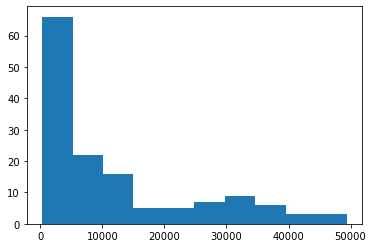

In [65]:
plt.hist(gm_latest['gdpPercap'])

This histogram tells us that many of the countries had a low GDP, which was less than 5,000. There is also a second "bump" in the histogram around 30,000. This type of distribution is known as **bi-modal**, since there are two modes, or most common values.

To make this histogram more interpretable let's add a title and labels for the $x$ and $y$ axes. We'll pass strings to `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to do so.

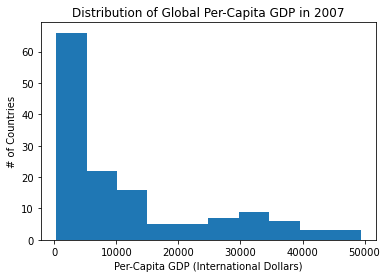

In [66]:
plt.hist(gm_latest['gdpPercap'])
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

`matplotlib` can be thought of as making a visualization from a series of layers. This is achieved by running several lines of code to build a visualization, then displaying it at the end of the block of code. In Jupyter notebook, a good guide is to use one visualization per cell.

Now back to our our histogram, each bar represents a bin. The height of the bar represents the number of items (countries in this case) within the range of values spanned by the bin. In the last plots we used the default number of bins (10), now let's use more bins by specifying the `bin=30` parameter. This is a unique parameter to the histogram plot.

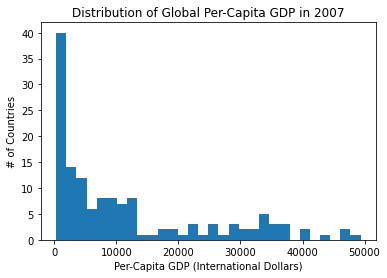

In [67]:
plt.hist(gm_latest['gdpPercap'], bins=30)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

We can see this histogram doesn't look as "smooth" as the last one. There's no "right" way to display a histogram, but some bin counts definitely are more informative than others. For example, using only 3 bins we cannot see the bi-modal nature of the GDP distribution.

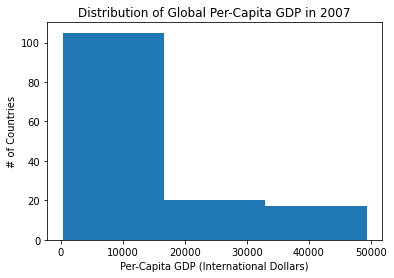

In [68]:
plt.hist(gm_latest['gdpPercap'], bins=3)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

### Using `pandas` to make plots
If you are familiar with `pandas`, you may also be familiar with the `pandas` plot method. 

These methods' plots are still produced by `matplotlib` on the backend, but can be accessed through `pandas`. The methods often require less code but they also provide less extensive customization. So they impose a **trade-off between convenience and customizability**.

Let's take a look at the `pandas` histogram equivalent to that above.
Here is the first, using the `DataFrame.hist()` method.

**Question:** What are the differences between the plot below and the equivalent plot above?


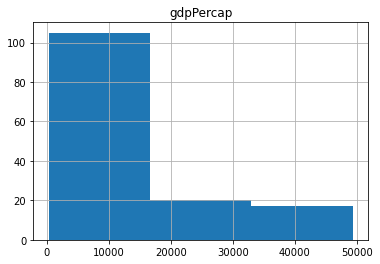

In [69]:
gm_latest.hist(column='gdpPercap', bins=3);

Notice that `pandas` plotting has some default settings and style so if you are trying to recreate a `matplotlib` plot this can take some additional code. We can also tap into all of the same title and labelling functions as in the `matplotlib` version of the histogram

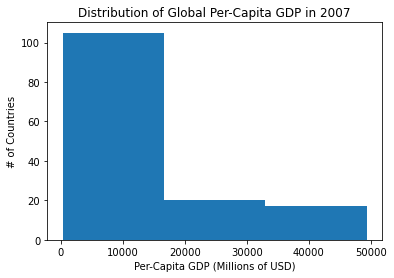

In [70]:
gm_latest.hist(column='gdpPercap', bins=3, grid=False)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

---
### Challenge 1: Make a histogram for life expectancy

Let's create a histogram of life expectancy in the year 2007 in the gapminder data set. The data are already subset for you in the `gm_latest` variable, so your task is to select the appropriate column and make a histogram. Remember to add an informative axis labels and title! Change the `bins=` parameter and find your favorite number of bins for the histogram.

---

TypeError: object of type 'ellipsis' has no len()

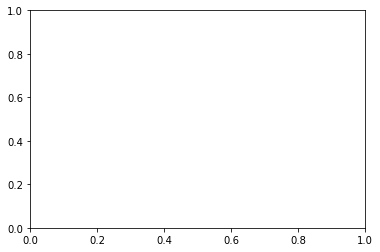

In [71]:
gm_latest

## YOUR CODE HERE
plt.hist(...)

### Bar Plots

Now let's turn to our second basic plot, a bar plot. A bar plot is used to compare a value for different groups. In this case, we are going to look at the number of countries per continent.

The first step is to get a DataFrame that has a row for each continent and a count for the number of countries. To do so we will need to follow a couple of steps. 

First, we need to change our `DataFrame` so instead of one row per country per year, there is just one row per country. We will do this by using `pd.groupby()` and `nunique` in order to count the number of unique countries per continent.

In [73]:
country_counts = gm[['continent','country']].groupby('continent', as_index=False).agg('nunique')
country_counts

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


Now that we have the data we want to visualize, we can plot these data as bars. 

Making a bar plot in `matplotlib` is done using `plt.bar`. This takes two arguments, the first is the location on the $x$-axis that the bars should appear- typically this is a sequence of integers equal to the number of groups- and the second is the height of each bar on the $y$-axis, which in our case is equal to the `country` column of the `country_count` variable. 

**Question:** Which continent has the highest number of countries? Where is that represented in the graph?

<BarContainer object of 5 artists>

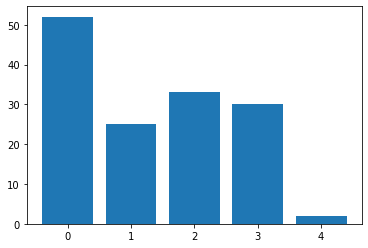

In [74]:
x = range(len(country_counts['continent']))
y = country_counts['country']
plt.bar(x,y)

Let's use `plt.xticks()` and the continent names to label the $x$-ticks, which are the text below each bar on the $x$-axis. The `plt.xticks()` function takes two arguments. The first is the *position* for the label and the second is the label itself.

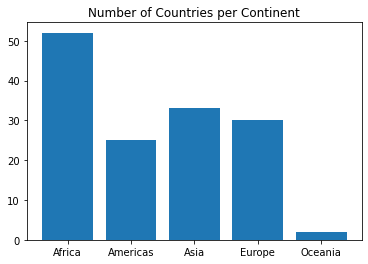

In [75]:
plt.bar(x, y)

plt.title('Number of Countries per Continent')
plt.xticks(x, country_counts['continent']);

**Note:** It is common practice to include error bars in bar plots. While it is possible to plot error bars in `matplotlib`, this is more commonly (and simply) done in `seaborn`, which is a package that we will introduce towards the end of the workshop. 

### Boxplots

Now that we know we've seen how GDP was distributed during 2007, and how many countries are in each continent, we might want to know how GDP is distributed within each continent. While we could plot 5 histograms, we can also take advantage of a useful type of plot for just this purpose, a **boxplot**.

`plt.boxplot()` creates just that, and can take a *list of arrays* with each array representing a distribution to plot. Since the number of countries in each continent is different, we will create an array for each continent that contains the GDP values of all countries in each continent.


In the following cell, we use `pandas` to generate a list of arrays, one per continent.

In [76]:
continent_gdp_latest = []
for c in country_counts['continent']:
    gm_latest_cur_cont = gm_latest[gm_latest['continent'] == c]
    cur_gdp_vals = gm_latest_cur_cont['gdpPercap'].values
    continent_gdp_latest.append(cur_gdp_vals)

In [77]:
continent_gdp_latest

[array([ 6223.367465 ,  4797.231267 ,  1441.284873 , 12569.85177  ,
         1217.032994 ,   430.0706916,  2042.09524  ,   706.016537 ,
         1704.063724 ,   986.1478792,   277.5518587,  3632.557798 ,
         1544.750112 ,  2082.481567 ,  5581.180998 , 12154.08975  ,
          641.3695236,   690.8055759, 13206.48452  ,   752.7497265,
         1327.60891  ,   942.6542111,   579.231743 ,  1463.249282 ,
         1569.331442 ,   414.5073415, 12057.49928  ,  1044.770126 ,
          759.3499101,  1042.581557 ,  1803.151496 , 10956.99112  ,
         3820.17523  ,   823.6856205,  4811.060429 ,   619.6768924,
         2013.977305 ,  7670.122558 ,   863.0884639,  1598.435089 ,
         1712.472136 ,   862.5407561,   926.1410683,  9269.657808 ,
         2602.394995 ,  4513.480643 ,  1107.482182 ,   882.9699438,
         7092.923025 ,  1056.380121 ,  1271.211593 ,   469.7092981]),
 array([12779.37964 ,  3822.137084,  9065.800825, 36319.23501 ,
        13171.63885 ,  7006.580419,  9645.06142 , 

Now we'll use this list of arrays to make a boxplot. We'll also update the x-ticks, title, and axes labels.

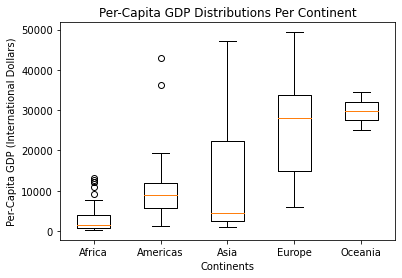

In [78]:
plt.boxplot(continent_gdp_latest)
plt.title('Per-Capita GDP Distributions Per Continent')
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)')
plt.xticks(range(1, len(country_counts['continent']) + 1), country_counts['continent']);


**Question:** What are some features that you notice about this figure?

### Challenge 2: Documentation and Arguments

Let's take a look at the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) for the boxplot function. Take a moment to read through the documentation and answer the following questions: 

1. What does the (orange) line in the middle of the box mean?
2. How are outliers determined? How can you change that value? (hint, look at the `whis` argument)
3. Let's say you want to flip the boxplot so the boxes are horizontal, not vertical- what argument would you change? Try it out below


**Hint:** All of these answers can be found in the documentation, but sometimes it can be more helpful to look at examples or do an internet search-- feel free to use any and all resources!


In [79]:
## YOUR CODE HERE

### Line Plots

Our next type of plot is a line plot, which is often used to show trends. For example, let's say that we're interested in visualizing a single country's per-capita GDP over time. To make things easier, we'll create a second `DataFrame` containing just data from Portugal to look at in this exercise.

In [80]:
portugal = gm[gm['country'] == 'Portugal']

In [81]:
portugal.head()

,country,continent,year,lifeExp,pop,gdpPercap
1236,Portugal,Europe,1952,59.82,8526050.0,3068.319867
1237,Portugal,Europe,1957,61.51,8817650.0,3774.571743
1238,Portugal,Europe,1962,64.39,9019800.0,4727.954889
1239,Portugal,Europe,1967,66.60,9103000.0,6361.517993
1240,Portugal,Europe,1972,69.26,8970450.0,9022.247417


Before we jump into plotting the function let's take another look at the documentation [Plot Types](https://matplotlib.org/stable/plot_types/index.html) to find an example of a line plot - what plot function should we use?

Now let's make our line plot.

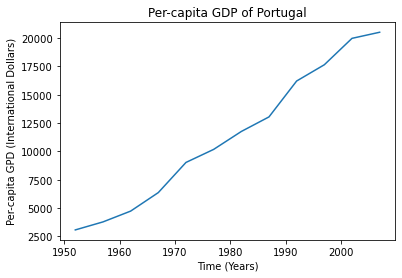

In [82]:
x = portugal['year']
y = portugal['gdpPercap'] 
plt.plot(x,y)
plt.title('Per-capita GDP of Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)');

This plot clearly shows that Portugal's per-capita GDP has been increasing over time. Cool!

Let's say we wanted to compare the GDP between Portugal and Spain. We can make a *multi-line* plot by calling `plt.plot()` twice, once on each subset of the data. Let's look at how that visualization will look below. 

**Note:** This is another case where while it is *possible* to make it with `matplotlib`, and useful for understanding how visualizations are layered, in *practice*, packages like `seaborn` are more often used for making multi-line plots.

In [83]:
spain = gm[gm['country'] == 'Spain']

**Question:** In the plots below, which line corresponds to which country? How do you know?

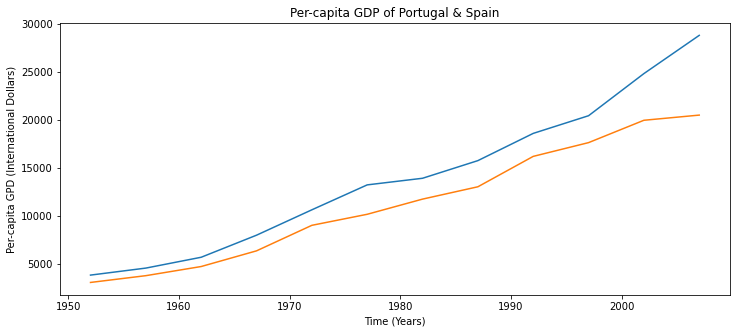

In [84]:
plt.figure(figsize=(12, 5))
plt.plot(spain['year'], spain['gdpPercap'])
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)');

Ok, that's cool, but which line represents which country? To determine that we need a legend. `matplotlib` makes it easy to create a legend. First, we need to add the `label=<country_name>` parameter to the `plt.plot()` functions, then call `plt.legend()`. Let's see it:

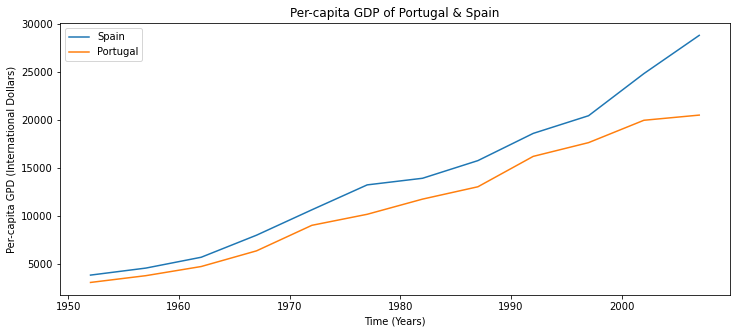

In [85]:
plt.figure(figsize=(12,5))
plt.plot(spain['year'], spain['gdpPercap'], label='Spain')
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal')
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

Much better! Now we can compare how these two GDPs change over the time period.

### Scatter Plots

The last basic plot that we will cover in `matplotlib` is the **scatter plot**. This plot is most useful for showing the relationship between two variables.

To illustrate this we'll use `plt.scatter()` to visualize the relationship between per capita GDP (`gdpPercap` on the $x$-axis) and life expectancy (`lifeExp`on the $y$-axis) across all countries and all years. Specifying the `marker='.'` argument tells the plot to use small circles to indicate each data point. There are many other marker styles, see [here](https://matplotlib.org/stable/api/markers_api.html) for more.


**Question:** How would you describe the relationship between GDP and life expectancy?

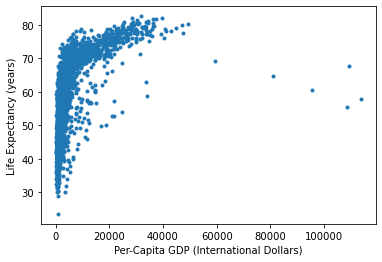

In [86]:
plt.scatter(gm['gdpPercap'], gm['lifeExp'], marker='.')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

### Transformations

The above scatter plot has some really large GDP values out to the right of the plot. When dealing with data that have large outliers like this, plotting a transformation of the data can make it more interpretable. A standard transformation is to apply the `log` function, so let's try that here.

**Note:** Let's not forget to change the x-axis label to indicate the new units being displayed! 

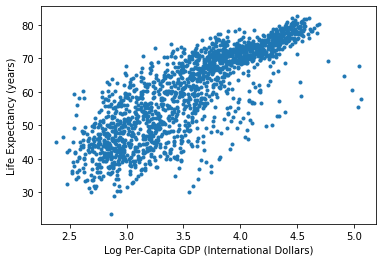

In [87]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.')
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

That looks much better. We can now see there is somewhat of a linear relationship between the log of GDP and life expectancy. Interesting!

#### Transparency

Now where points overlap it can be hard to get a clear idea of how many points are in those regions. To fix that we can change the transparency of the markers using the `alpha` parameter. This is a value from `0`-`1`, where `0` is completely transparent (e.g. it's not displayed) to `1` being completely opaque (which is the default seen in the previous plot).

And while we're at it we'll change the fill color with the `facecolor` parameter, and the border color of each marker with the `edgecolor` parameter using one of the pre-defined `Matplotlib` colors.

For *no* color, use `'None'`. For more information on colors in `Matplotlib` see [the documentation](https://matplotlib.org/stable/api/colors_api.html).

A great place to find information on color palettes is [ColorBrewer](http://colorbrewer2.org/). Matt Davis has created a great Python package called [Palettable](https://jiffyclub.github.io/palettable/) that gives you access to the ColorBrewer, Cubehelix, Tableau, and Wes Anderson palettes.

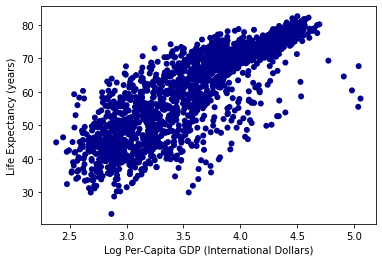

In [88]:
plt.scatter(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=1,
            facecolor='DarkBlue',
            edgecolor='None')
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

---
### Challenge 3: Customizing Markers

1. Try at least three different values of alpha below. Which value is your favorite?

2. What other features of the plot might you change to make it more aesthetically pleasing or interpretable? Try out changing some of the other arguments below, or make a list of properties of the plot you would like to change.
---

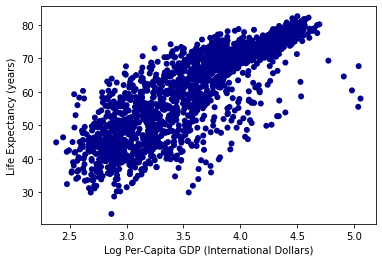

In [89]:
plt.scatter(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=1, #change transparency here
            facecolor='DarkBlue',
            edgecolor='None')
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

Now that we've seen that there exists a relationship between GDP and life expectancy at the global scale and across the last 50 years, let's see if we can use similar scatter plots to break that relationship down as a function of both time (year) and location (continent). 

To do that we'll introduce two new techniques, the use of color and `subplots`.

#### Color

   Within a scatter plot, each data point may be assigned a different color depending on it's value in a *numeric* third variable. To do so, we will use the `c` argument the same way that we define `x` or `y` in the plot. There are two ways `c` can be used:
   
   1. If `c` is a string, it will make all points in the plot that color
   2. If `c` is a column of a DataFrame (or similar) it will assign a color to each point according to the value of the column.
   
We'll make the same exact scatter plot as we just did, but add color to represent the year the data comes from. We'll choose the color scheme for the plot by setting the `cmap` (color map) variable.

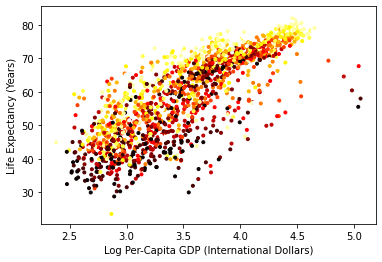

In [90]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap = 'hot')
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (Years)');

While we can see there is some sort of trend dependent on color, we don't know what the color values mean. 

We can use `plt.colorbar()` to add a colorbar which will let us interpret the colors. By adding `.set_label()` to it we can set a textual label describing what the values in the colorbar represent.

We'll also increase the figure size, and the font size used in the title, xlabel and ylabel using the `fontsize=16` parameter. We'll also use a form of LaTeX called MathJax to write a subscript 10 underneath the word Log, like this: $\log_{10}$.

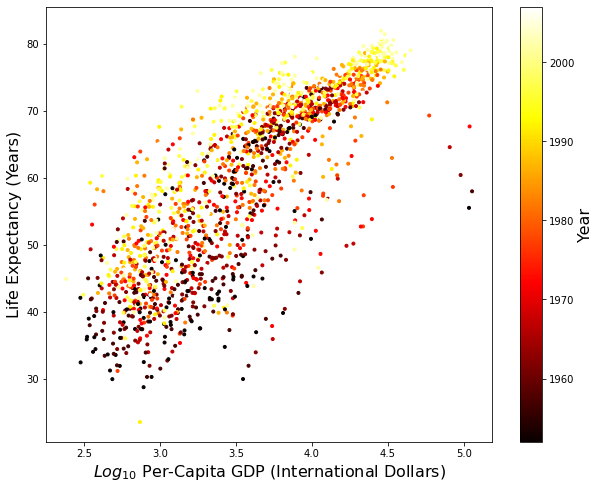

In [91]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('$Log_{10}$ Per-Capita GDP (International Dollars)', fontsize=16)
plt.ylabel('Life Expectancy (Years)', fontsize=16)

#add a colorbar
plt.colorbar().set_label('Year', fontsize=16);

Ok, now we can see that as time has increased average life expectancy has also increased. Nice! 

Now let's use `subplots` to break this down even further and see if this trend holds across all continents.

#### Subplots

Subplots allow you to draw multiple plots within a single figure. To do so, you use `plt.subplot(<num_rows>, <num_cols>, <index>)` where the number of rows and columns you want in the figure are specified as the first two parameters, respectively. The `<index>` tells subplot which subplot subsequent calls to `plt` will draw in. It starts at `1` for the top left subplot, and increases across rows, and then down columns. 

**Note:** `plt.subplot()` uses a 1-based index (not 0-based like Python) to emulate the behavior of the Matlab version of this function. This can cause confusion!!

Let's look at a simple example plotting Spain and Portugal's GDP on separate plots next to each other in the same row.

**Question:** How does this look different from the multi-line plot above? What information is being highlighted here?

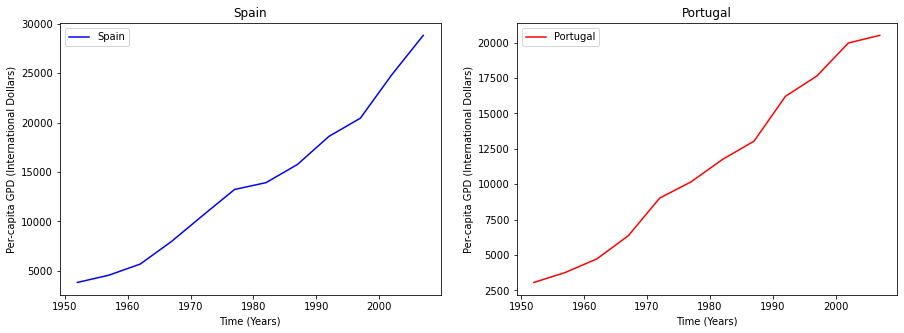

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

To set the y-axis values explicitly, we'll use the `vmin` and `vmax` option parameters. Let's see it:

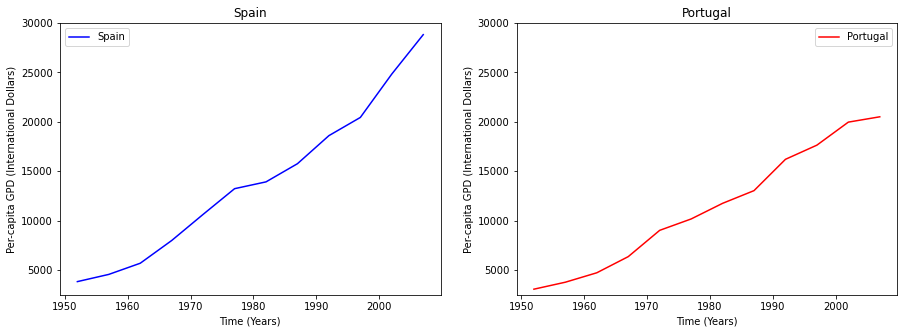

In [94]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.ylim(2500, 30000)
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.ylim(2500, 30000)
plt.legend();

Now let's return to making scatter plots for each continent separately. Since we have data on 5 continents, we'll make a figure with 6 subplots, 3 rows and 2 columns.

To do so we'll iterate (loop) over each continent and get a `DataFrame` that contains only the rows for countries in that continent. Then we'll set the subplot and create a scatter plot using that new `DataFrame`. Here's how it looks:

**Question:** How long did it take for the below cell to run?

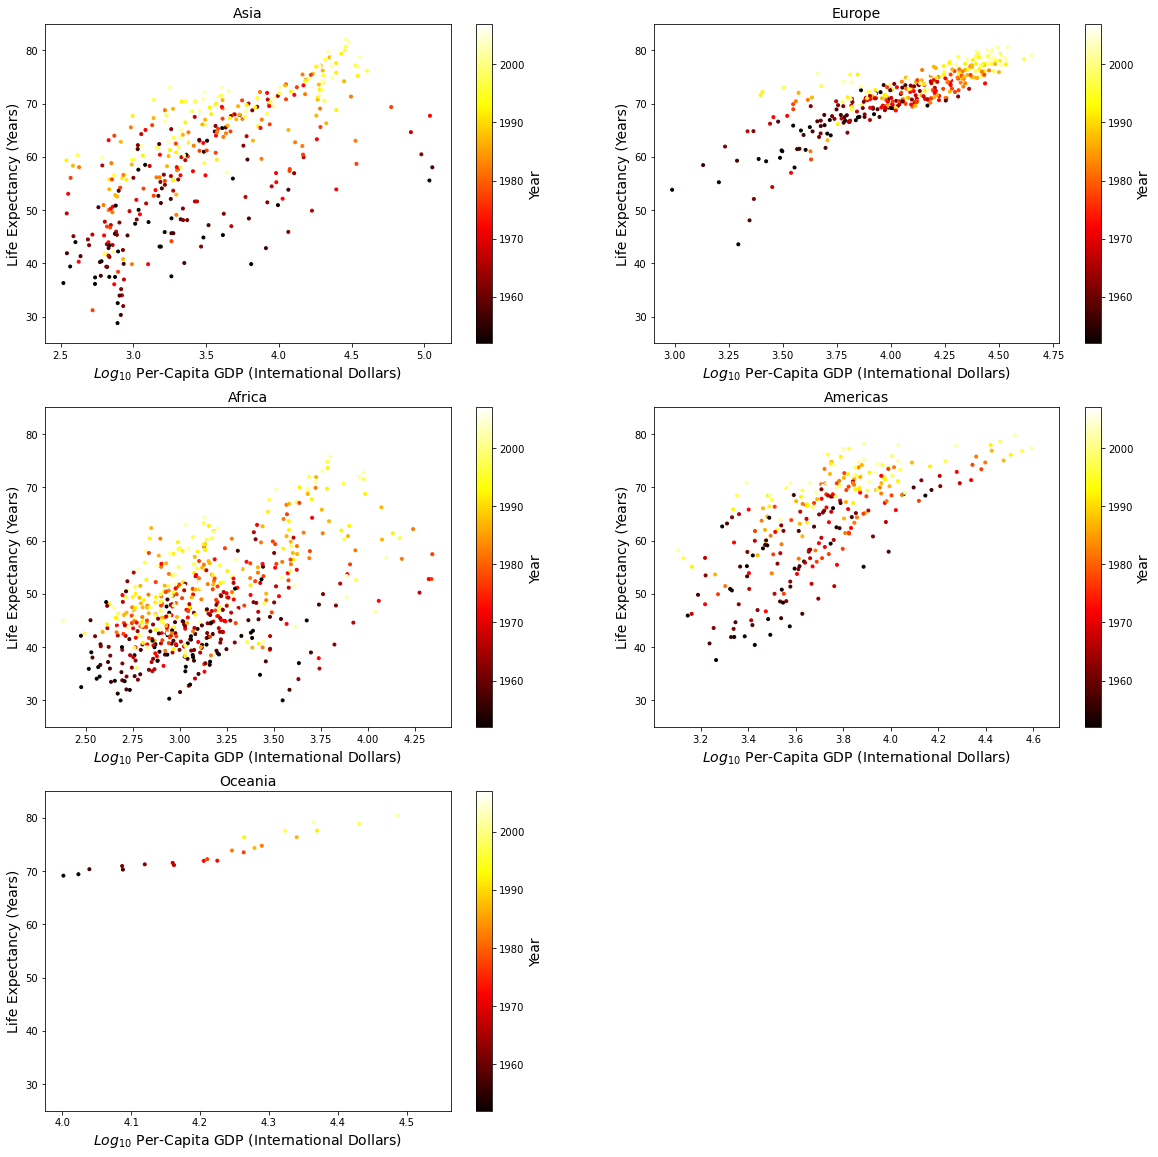

In [97]:
plt.figure(figsize=(20, 20))

for i,continent in enumerate(gm['continent'].unique()):
    # Get a dataframe with just countries in the current continent
    cur_continent_df = gm[gm['continent'] == continent]

    # Set the current subplot
    plt.subplot(3, 2, i+1)
    
    # make the current scatter plot 
    plt.scatter(np.log10(cur_continent_df['gdpPercap']), 
                cur_continent_df['lifeExp'], 
                marker='.', 
                c=cur_continent_df['year'], 
                cmap='hot')
    plt.xlabel('$Log_{10}$ Per-Capita GDP (International Dollars)', fontsize=14)
    plt.ylabel('Life Expectancy (Years)', fontsize=14)
    plt.title(continent, fontsize=14)
    plt.ylim(25, 85)
    plt.colorbar().set_label('Year', fontsize=14);

---
### Challenge 4: Population and GDP

We've seen that life expectancy and per-capita GDP have a positive relationship. Now let's take a look at the relationshp between population and per-capita GDP. Create a scatter plot that compares the two across all countries in 2007. Modify the scatterplot using the parameters we've discussed in the past sections (or other parameters as well!). What is the relationship between the two variables?

---

In [99]:
gm_latest
##YOUR CODE HERE

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923.0,974.580338
23,Albania,Europe,2007,76.423,3600523.0,5937.029526
35,Algeria,Africa,2007,72.301,33333216.0,6223.367465
47,Angola,Africa,2007,42.731,12420476.0,4797.231267
59,Argentina,Americas,2007,75.320,40301927.0,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356.0,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332.0,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743.0,2280.769906
1691,Zambia,Africa,2007,42.384,11746035.0,1271.211593


## Plot Customization

The `matplotlib` defaults aren't the best. We've already changed several properties of the figures we've made, including the color and opacity of scatter plots, and font sizes for the title and axis label text. While this is useful, it can become tedious to include many customization parameters in every plot we make. We can, however, customize almost any property for all plots using the `matplotlibrc` configuration file. This file allows you to specify new default values for `matplotlib` properties, which are called "rc settings" or "rc parameters". These settings are then loaded every time you use `matplotlib`.

The `matplotlibrc` file is typically found in the `.../site-packages/matplotlib/mpl-data` directory. Here is an example of a full path: `/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data`. The full path on your computer will depend on where *your* Python is installed.


Before setting these new rc settings manually, let's create a plot using the default rc settings, so we can see how they change the look of the plot. 

We'll plot the average per-capita GDP across time for each continent separately. To do this we'll use `groupby` again, this time grouping by continent and year, and then taking the mean over GDP.

In [100]:
per_continent_mean_gdp = gm.groupby(['continent', 'year'], as_index=False)['gdpPercap'].mean()

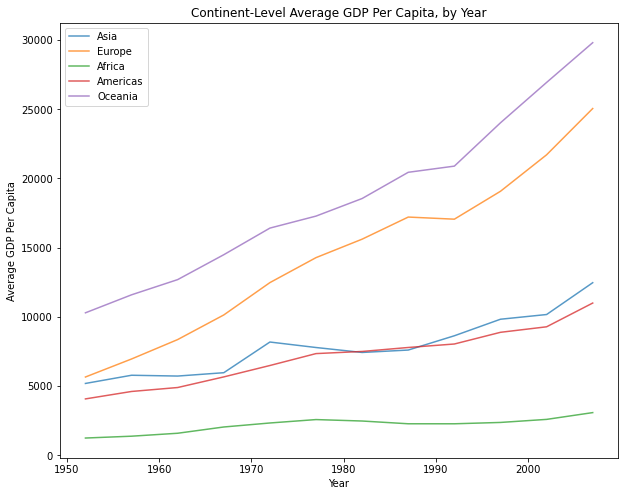

In [103]:
plt.figure(figsize=(10, 8))

for continent in gm['continent'].unique():
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

Ok, that's a decent looking plot, but it can be better! Let's change the default rc settings. Instead of modifying the `matplotlibrc` file directly, we'll change some default rc settings directly using Python code. Changing the rc settings in code *does not* modify your `matplotlibrc` file, and it only changes the settings for the current Python session. 

Below is a dictionary containing some rc parameters whose values we're going to modify. The keys of the dictionary are the rc parameter names, and the values are the new defaults that we're setting. 

These parameter values come from Cameron Davidson-Pilon's [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/styles/matplotlibrc#L240) colors.

Let's have a look...

In [104]:
params = {'figure.facecolor' : 'white',
          'axes.facecolor' : 'white',
          
          'axes.titlesize' : 'x-large',
          'axes.axisbelow' : True,
          
          'axes.edgecolor' : 'DimGray',
          'axes.linewidth' : 0.5,
          
          'axes.labelsize' : 'large',
          'axes.labelcolor' : '#4A4A4A',
          
          'axes.grid' : True,
          'grid.linestyle' : ':',
          'grid.color' : 'DimGray',
          'grid.alpha' : 0.5,
          
          'xtick.color' : '#4A4A4A',
          'xtick.major.size' : 0,
          'xtick.minor.size' : 0,
          'xtick.labelsize' : 'medium',
          
          'ytick.color' : '#4A4A4A',
          'ytick.major.size' : 0,
          'ytick.minor.size' : 0,
          'ytick.labelsize' : 'medium',
          
          'text.color' : '#4A4A4A',
          
          'legend.fancybox' : False,
          'legend.frameon' : False,
          'legend.fontsize' : 'large'}

We don't have the time to go through each setting separately, so we'll just see the overall before and after effect. The names are somewhat intuitive however, but more information on all the settings can be found in the [documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html). You can also get a complete list of all the possible parameters by printing `mpl.rcParams`.

The rc settings are stored in a dictionary-like variable called `matplotlib.rcParams`. Because we imported `matplotlib` using `import matplotlib as mpl`, we'll need to use `mpl.rcParams` instead. 

To update the default settings we simply iterate over all of the rcsettings in the dictionary we just created, and update `plt.rcParams` with each key/value pair, like this.

In [105]:
for (k, v) in params.items():
    plt.rcParams[k] = v

Now let's recreate the same exact time-series plot of the average GDP per continent. The code here is *EXACTLY* the same as in several cells above. What makes the plots look different is the setting of the default rc parameters we just did.

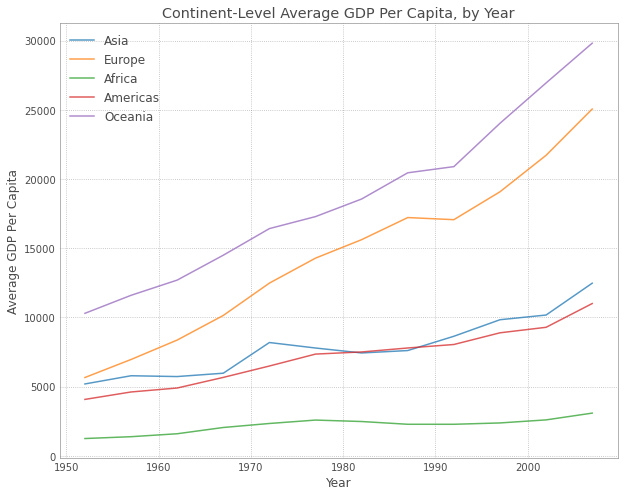

In [107]:
plt.figure(figsize=(10, 8))

for continent in gm['continent'].unique():
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

What's changed? Do you like this look better?

#### Style Sheets

Style sheets are built-in collections of rc parameters that allow for a quick and easy way to get nice looking plots in a particular style. To use a style sheet you simply call the `plt.style.use()` function and give it the name of the style sheet you want to use. Let's try to use the "Five Thirty Eight" style sheet, the name of which you might recognize as Nate Silver's website, of New York Times data visualization fame.

For more on style sheets print all available style sheets using `plt.style.available`, or see the ([documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html)).

In [108]:
plt.style.use('fivethirtyeight')

Now we'll use the same code again, and see how it has changed!

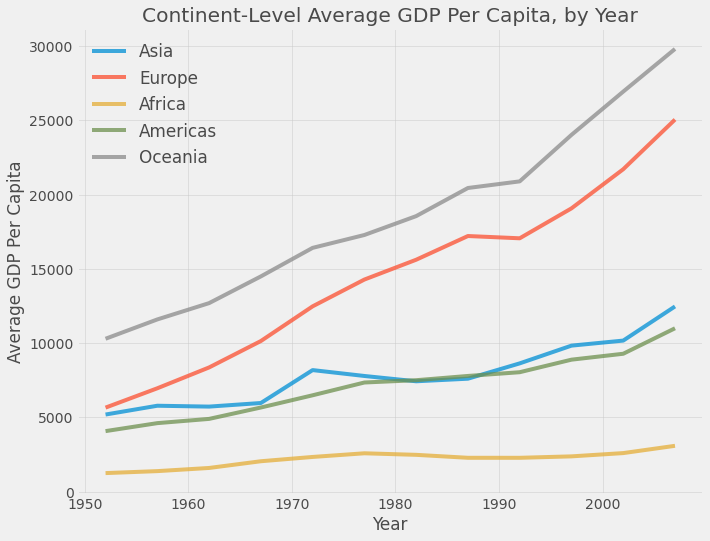

In [110]:
plt.figure(figsize=(10, 8))

for continent in gm['continent'].unique():
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

While the default style settings are certainly sufficient for exploratory data analysis and visualizing trends in data, one of the best things about plotting with Python is extensive control over the style for more polished figures. 

We can combine `rcParams` with the fivethirtyeight style to remove the grid in the background, while retaining the other aspects of the style. This means that it can be very efficient to find a style sheet that is close to the desired final product, then tune it to our needs. 

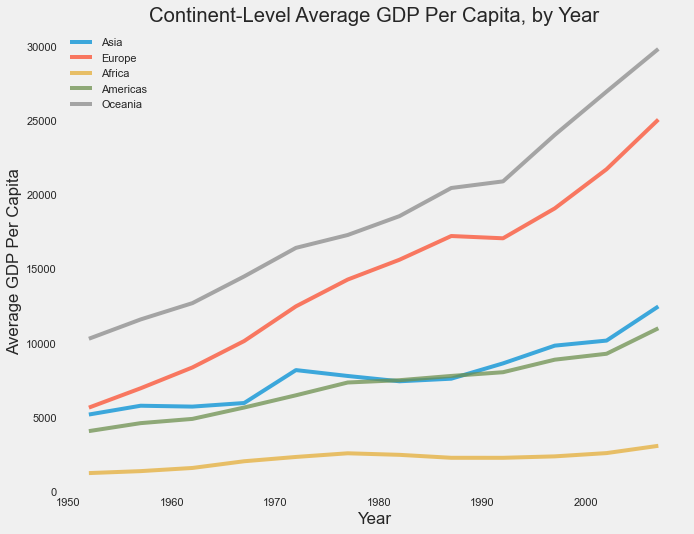

In [134]:
#set style to 'ggplot'
plt.style.use('fivethirtyeight')

# Change the title font
plt.rcParams['axes.grid'] = False

plt.figure(figsize=(10, 8))

for continent in gm['continent'].unique():
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

---
### Challenge 5: Customizing a style sheet

Now let's explore another plot customization. For the plot below:

1. Look at the [documentation](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) and pick a style that you find appealing.

2. Choose a [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for the `cmap` parameter.

3. Use `rcParams` to customize one (or more) aspects of the style. 

4. Are there any further changes that you'd like to make and aren't sure how? 

---

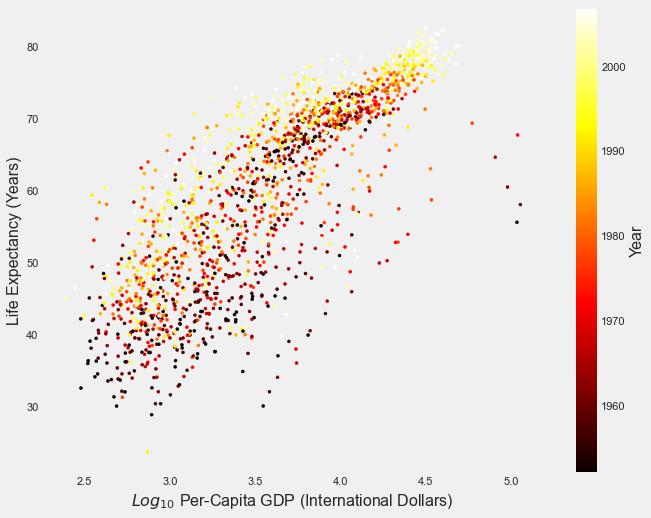

In [135]:
## Choose style sheet

## Customize one or more parameters


plt.figure(figsize=(10, 8))
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot') #modify the cmap here
plt.xlabel('$Log_{10}$ Per-Capita GDP (International Dollars)', fontsize=16)
plt.ylabel('Life Expectancy (Years)', fontsize=16)

#add a colorbar
plt.colorbar().set_label('Year', fontsize=16);

## Seaborn

Now we will turn to the second major package for visualization. "`seaborn` is a Python visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive *statistical* graphics."

While `seaborn` also provides convenient and useful style changes over `matplotlib`, it's key benefits come in terms of more complex types of plots, support for statistical analysis (such as regression, error bars), and integration with `pandas`. However all of this functionality is built on the foundation of `matplotlib`, and so understanding that plotting package well is essential to using `seaborn` effectively.

A typical visualization workflow will include a `seaborn` base plot, combined with `matplotlib` code for items such as title, etc.

Let's try it out!

In [136]:
import seaborn as sb
sb.set(rc={'axes.facecolor' : '#EEEEEE'})

The `sns.set()` function allows us to change some of the `rcParams`. Here, we're changing the plot's face color.

`seaborn` has the capacity to create a large number of informative, beautiful plots very easily. Here we'll review several types, but please visit their [gallery](https://seaborn.pydata.org/examples/index.html) for a more complete picture of all that you can do with `seaborn`.

### Boxplots Revisited
We previously looked at boxplots in `matplotlib`. Let's now use `seaborn` to look at the distributions of life expectancies separately for each continent. 

`Seaborn` includes native support for `pandas` data structures. To use it we specify the `DataFrame` we want to take the data from in the `data` parameter. We then specify which column names (or variables) from that `DataFrame` to use for in `x` and `y`. `x` specifies the variable to groupby, and `y` specifies the variable whose distribution should be plotted.

We'll plot the continents in alphabetical order by specifying the `order=` parameter, make the box face colors all white using `color='white'`, and disable drawing of the fliers (or outliers) using `fliersize=0`.

In addition to the boxplot, we'll plot a **stripplot**, which overlays a scatter plot of all the data points over each box. In combination, they're quite useful for understanding distributions. This takes many of the same parameters as the boxplot did, with the exception of `jitter=True` which causes the scatter markers to be slightly jittered horizontally. 

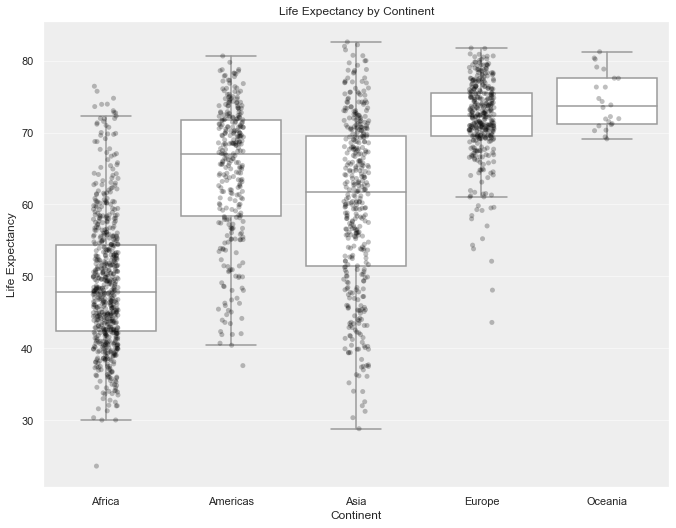

In [123]:
plt.figure(figsize=(10, 8))

sb.boxplot(x="continent", y="lifeExp", data=gm,
            order=np.sort(gm.continent.unique()),
            color='white', fliersize=0)

sb.stripplot(x="continent", y="lifeExp", data=gm,
              order=np.sort(gm.continent.unique()),
              alpha=0.25, size=5, jitter=True,
              color='Black', edgecolor='Black')

plt.title("Life Expectancy by Continent")
plt.xlabel('Continent')
plt.ylabel('Life Expectancy');

With just a few lines of code we have a very nice looking plot using `seaborn`. It's possible to create a stripplot using `Matplotlib`, but it's not as easy as it is with `Seaborn`.

### Heatmaps 
`Seaborn` can be used to create Heatmaps which are helpful visualizations when we would like to plot three variables, one continuous and two factors in which a color scale is created to highlight the magnitude of the continuous variable.

We will revisit our `per_continent_mean_gdp` dataset that outlines the average per-capita GDP across time for each continent to create our heatmap. 

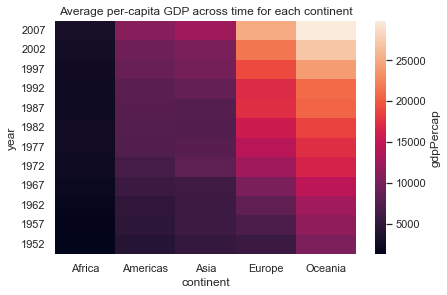

In [137]:
heatmap = per_continent_mean_gdp.pivot(index="year", 
                                       columns="continent", 
                                       values="gdpPercap")
heatmap = heatmap.sort_index(ascending=False)
heatmap_graph = sb.heatmap(heatmap,
           cbar_kws = {'label' : "gdpPercap"})

plt.title("Average per-capita GDP across time for each continent");

### Regression Plots

While `seaborn` provides easy ways to make nice-looking plots, it is ultimately a package built for statistical data visualization. It includes many useful built-in plots, such as the following **regression plot**. Here all the data values are plotted using a scatter plot, and a regression line is fit, and plotted, over that data. 

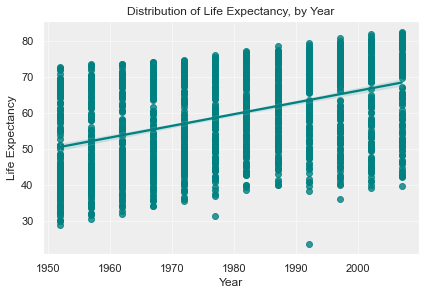

In [133]:
sb.regplot(x='year', y='lifeExp', data=gm, color='teal')

plt.title('Distribution of Life Expectancy, by Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy');

### Kernel Density Plots

We learned earlier that histograms can be used to visualize the discretized distribution of a variable. We must specify the number of bins in a histogram and as a result the shape of the distribution can change wildly depending on that somewhat arbitrary choice.

A better way to plot a distribution is to estimate it's kernel density and plot it using `sns.kdeplot()`. Let's plot the kernel density for per-capita GDP in 2007 as we did earlier using a histogram. In fact, let's plot the two side by side using subplots.

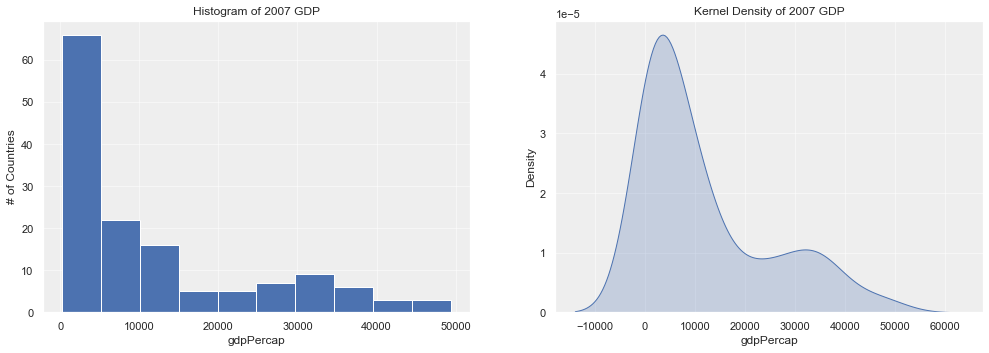

In [139]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(gm_latest['gdpPercap'])
plt.xlabel('gdpPercap')
plt.ylabel("# of Countries")
plt.title('Histogram of 2007 GDP')

plt.subplot(1, 2, 2)
sb.kdeplot(gm_latest['gdpPercap'], shade=True)
plt.title('Kernel Density of 2007 GDP');

### Joint Distribution Plots

We've already used scatter plots to visualize the relationship between two variables. It is sometimes useful to not only see the relationship between the two variables, but to visualize each variables respective distribution. The `sns.jointplot` function in `seaborn` let's you do just that.

Let's compare the log of per-capita GDP and life expectancy in a joint distribution plot.

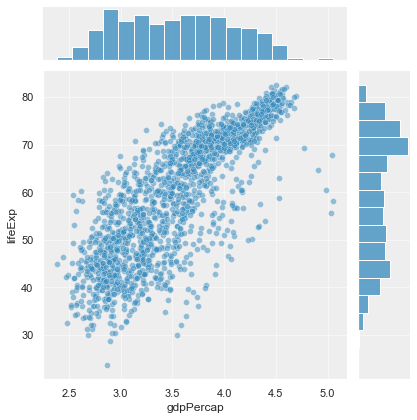

In [141]:
sb.jointplot(x=np.log10(gm['gdpPercap']), y=gm['lifeExp'], color="#348ABD", alpha=0.5);

### Caveats

It's important to note that a side effect of importing `seaborn` is that it changes *all* plot styles. For example, if you wanted to create the same line plot of Portugal's GDP over time using `matplotlib`, it would now look like the following since we've already imported searborn.

In [ ]:
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)');

### `FacetGrid`

In the previous `matplotlib` section we used `subplots` to make continent-specific scatter plots of per-capita GDP vs. life expectancy. Let's see how much easier that can be done using the `FacetGrid` in `seaborn`.

In [ ]:
g = sns.FacetGrid(gm, col='continent', col_wrap=3, height=4, sharex=False)
g.map(plt.scatter, 'gdpPercap', 'lifeExp', marker='.');

That's pretty good, and quick. We are missing the color coding based on year however. To add this capability, and to shorten the code even further, we'll use a `relplot`, or relational plot.

In [ ]:
sns.relplot(x='gdpPercap', 
            y='lifeExp', 
            hue='year', 
            col='continent', 
            col_wrap=3, 
            palette='hot', 
            legend='full',
            kind='scatter',
            facet_kws={'sharex':False},
            data=gm);

You can also use `sns.relplot` for line plots. In fact, many `seaborn` plots can be easily plotted using a FacetGrid using another plotting function, just as `relplot` integrates a `FacetGrid` with either a `scatter` or `line` plot. See the [API documentation](https://seaborn.pydata.org/api.html) for more details.

## Saving Plots

Finally, if you'd like to save a plot you can use the `plt.savefig` function that is part of the matplotlib package. This will create an image file saved to wherever you specify. Running the cell below will save the plot as `facetgrid_graph.png` within your current directory. Refer to `help(plt.savefig)` for more documentation on this function.

In [ ]:
sns.relplot(x='year', 
            y='gdpPercap', 
            hue='continent',
            col='continent', 
            col_wrap=3, 
            legend=None,
            kind='line',
            facet_kws={'sharex':False},
            data=per_continent_mean_gdp);
plt.savefig('facetgrid_graph.png')

## Going further

There are many visualization libraries in Python and you now have experience in using two popular ones.

Several other Python visualization libraries exist for creating *interactive* visualizations such as [Plotly](https://plot.ly/python/), [Bokeh](http://bokeh.pydata.org/en/latest/), or [Toyplot](http://toyplot.readthedocs.org/en/stable/tutorial.html#getting-started).